<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

Let us classify handwritten digits using 
1. A simple NN which has only input and output layers. 
2. NN with one hidden layer.
3. NN with two hidden layers.

and see how the performance of the model improves

<img src="Figures/MNIST-Handwritten digits.png" height=450 width=450/>

#### TensorFlow Installation

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.version.VERSION)

2.9.1


#### Import the necessary libraries

In [4]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [5]:
K.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="Figures/dataset.png" height=450 width=450 />

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='Figures/pixel.png' />

In [10]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

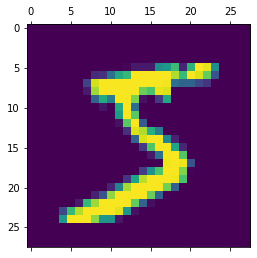

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]
# Label for the above input image

5

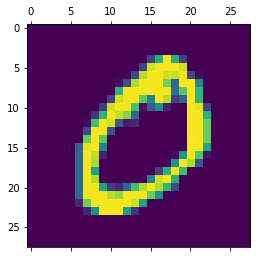

In [13]:
plt.matshow(X_train[1])

In [14]:
y_train[1]

0

In [15]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Normalize the input dataset

In [22]:
X_train_normalized = X_train_flattened / 255

In [23]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
X_test_normalized = X_test_flattened / 255

### NN model with one hidden layer

<img src="Figures/model2.png" height=400 width=400 />

###### Model configuration

In [25]:
model = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')    
])

##### Model summary

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Layer details

In [27]:
model.layers

In [28]:
len(model.layers)

2

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [30]:
model.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=10000)

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 2.1132 - accuracy: 0.2851
Epoch 2/100
6/6 [==============================] - 0s 32ms/step - loss: 1.6224 - accuracy: 0.6253
Epoch 3/100
6/6 [==============================] - 0s 30ms/step - loss: 1.2323 - accuracy: 0.7431
Epoch 4/100
6/6 [==============================] - 0s 51ms/step - loss: 0.9409 - accuracy: 0.8074
Epoch 5/100
6/6 [==============================] - 0s 37ms/step - loss: 0.7443 - accuracy: 0.8358
Epoch 6/100
6/6 [==============================] - 0s 37ms/step - loss: 0.6192 - accuracy: 0.8538
Epoch 7/100
6/6 [==============================] - 0s 35ms/step - loss: 0.5386 - accuracy: 0.8679
Epoch 8/100
6/6 [==============================] - 0s 36ms/step - loss: 0.4840 - accuracy: 0.8787
Epoch 9/100
6/6 [==============================] - 0s 39ms/step - loss: 0.4453 - accuracy: 0.8862
Epoch 10/100
6/6 [==============================] - 0s 31ms/step - loss: 0.4162 - accuracy: 0.8922
Epoch 11/100
6/6 [=

##### Printing the weights

Getting weights and bias values after the training stage

In [31]:
original_weights = model.get_weights()
# convert list to array
weights = np.array(original_weights)
weights

<ipython-input-31-4f8fb3d8cc7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(original_weights)


array([array([[-0.03538071,  0.06143115, -0.00920825, ...,  0.07694348,
               -0.06336627, -0.02985901],
              [ 0.05609714,  0.01955693,  0.04191541, ..., -0.01755571,
               -0.05684364, -0.0196322 ],
              [ 0.07225203,  0.02625041,  0.08382943, ...,  0.07745729,
               -0.02538193,  0.029179  ],
              ...,
              [-0.03052002,  0.01152073, -0.07683243, ...,  0.03461659,
               -0.08066462,  0.08038587],
              [-0.01147573,  0.02899122, -0.03833948, ...,  0.06803777,
                0.07130397,  0.00178341],
              [-0.07740592, -0.04057959,  0.06838123, ..., -0.05793588,
                0.00198298,  0.03507607]], dtype=float32)              ,
       array([ 0.00295629,  0.09387647,  0.00351386, -0.09577934,  0.05082063,
               0.12285773, -0.12165615,  0.04164711,  0.09912349,  0.10387205,
               0.01999453,  0.01008249, -0.00632722, -0.00223421,  0.04834028,
               0.00683112,  0

In [32]:
weights.shape

(4,)

In [33]:
# weights of first layer
weights[0].shape

(784, 64)

In [34]:
# bias of first layer
weights[1].shape

(64,)

In [35]:
# weights of second layer
weights[2].shape

(64, 10)

In [36]:
# bias of second layer
weights[3].shape

(10,)

In [37]:
weights[0] 

array([[-0.03538071,  0.06143115, -0.00920825, ...,  0.07694348,
        -0.06336627, -0.02985901],
       [ 0.05609714,  0.01955693,  0.04191541, ..., -0.01755571,
        -0.05684364, -0.0196322 ],
       [ 0.07225203,  0.02625041,  0.08382943, ...,  0.07745729,
        -0.02538193,  0.029179  ],
       ...,
       [-0.03052002,  0.01152073, -0.07683243, ...,  0.03461659,
        -0.08066462,  0.08038587],
       [-0.01147573,  0.02899122, -0.03833948, ...,  0.06803777,
         0.07130397,  0.00178341],
       [-0.07740592, -0.04057959,  0.06838123, ..., -0.05793588,
         0.00198298,  0.03507607]], dtype=float32)

In [38]:
model.layers[0].get_weights()
# displays the weights and biases of first layer

[array([[-0.03538071,  0.06143115, -0.00920825, ...,  0.07694348,
         -0.06336627, -0.02985901],
        [ 0.05609714,  0.01955693,  0.04191541, ..., -0.01755571,
         -0.05684364, -0.0196322 ],
        [ 0.07225203,  0.02625041,  0.08382943, ...,  0.07745729,
         -0.02538193,  0.029179  ],
        ...,
        [-0.03052002,  0.01152073, -0.07683243, ...,  0.03461659,
         -0.08066462,  0.08038587],
        [-0.01147573,  0.02899122, -0.03833948, ...,  0.06803777,
          0.07130397,  0.00178341],
        [-0.07740592, -0.04057959,  0.06838123, ..., -0.05793588,
          0.00198298,  0.03507607]], dtype=float32),
 array([ 0.00295629,  0.09387647,  0.00351386, -0.09577934,  0.05082063,
         0.12285773, -0.12165615,  0.04164711,  0.09912349,  0.10387205,
         0.01999453,  0.01008249, -0.00632722, -0.00223421,  0.04834028,
         0.00683112,  0.03841177,  0.03260387,  0.08312023,  0.03487472,
        -0.03455346,  0.04089008,  0.09399182,  0.09469903, -0.008

In [39]:
model.layers[0].get_weights()[0]
# Displays the weights of first layer

array([[-0.03538071,  0.06143115, -0.00920825, ...,  0.07694348,
        -0.06336627, -0.02985901],
       [ 0.05609714,  0.01955693,  0.04191541, ..., -0.01755571,
        -0.05684364, -0.0196322 ],
       [ 0.07225203,  0.02625041,  0.08382943, ...,  0.07745729,
        -0.02538193,  0.029179  ],
       ...,
       [-0.03052002,  0.01152073, -0.07683243, ...,  0.03461659,
        -0.08066462,  0.08038587],
       [-0.01147573,  0.02899122, -0.03833948, ...,  0.06803777,
         0.07130397,  0.00178341],
       [-0.07740592, -0.04057959,  0.06838123, ..., -0.05793588,
         0.00198298,  0.03507607]], dtype=float32)

In [40]:
model.layers[0].get_weights()[1]
# Displays the biases of first layer

array([ 0.00295629,  0.09387647,  0.00351386, -0.09577934,  0.05082063,
        0.12285773, -0.12165615,  0.04164711,  0.09912349,  0.10387205,
        0.01999453,  0.01008249, -0.00632722, -0.00223421,  0.04834028,
        0.00683112,  0.03841177,  0.03260387,  0.08312023,  0.03487472,
       -0.03455346,  0.04089008,  0.09399182,  0.09469903, -0.00825668,
        0.11233675, -0.04927043,  0.03187941,  0.05185093,  0.03846805,
        0.00306272,  0.05066532,  0.03543073,  0.09054895,  0.02274616,
        0.11184191,  0.02390583,  0.05617566,  0.0303709 ,  0.08544561,
        0.01390151, -0.03842801, -0.00417885, -0.05070636,  0.07522286,
       -0.06228704,  0.20672254, -0.16800392, -0.01416446,  0.01091245,
       -0.1391001 ,  0.03912808, -0.13822664,  0.04034384,  0.08189411,
        0.00691685,  0.20335339,  0.05310727,  0.06171127,  0.03432862,
        0.08455648,  0.0740042 , -0.0234296 , -0.04317106], dtype=float32)

In [41]:
model.layers[1].get_weights()
# displays the weights and biases of second layer

[array([[ 2.23525129e-02, -3.90089124e-01, -7.68951513e-03,
         -3.91994178e-01, -3.21712583e-01, -1.39324233e-01,
          9.98350382e-02,  3.41024697e-01,  5.64700127e-01,
         -4.93382961e-01],
        [-1.39820427e-01, -1.22656122e-01, -3.81131470e-01,
         -1.51059935e-02,  1.55533805e-01,  1.37326092e-01,
         -1.33430049e-01,  1.31802216e-01,  1.13152489e-01,
          2.09930688e-01],
        [-1.81412399e-01, -3.70060414e-01,  3.33901107e-01,
         -9.53271091e-02, -3.68593991e-01,  2.99395412e-01,
          1.45874694e-01, -7.56293610e-02,  1.32607162e-01,
         -1.56138808e-01],
        [ 1.87605232e-01, -3.40062618e-01,  2.01378465e-01,
          3.65229338e-01, -9.40627791e-03, -9.50374603e-02,
         -1.76316544e-01, -3.60216558e-01, -7.50726312e-02,
          2.05588952e-01],
        [ 2.93449521e-01,  6.62723631e-02,  7.90631250e-02,
          2.25037888e-01, -2.66338605e-02,  3.94946247e-01,
          2.05612123e-01, -2.95124710e-01,  1.133539

##### weights update using HM example

In [42]:
array1 = np.array([[2,2],[3,3]])
array2 = np.array([[4,4],[5,5]])

In [43]:
array1, array2

(array([[2, 2],
        [3, 3]]),
 array([[4, 4],
        [5, 5]]))

In [44]:
array1 + array2

array([[6, 6],
       [8, 8]])

In [45]:
array1 * array2

array([[ 8,  8],
       [15, 15]])

In [46]:
array1 / array2

array([[0.5, 0.5],
       [0.6, 0.6]])

In [47]:
2*(array1 * array2)

array([[16, 16],
       [30, 30]])

In [48]:
updated = 2*(array1 * array2)/(array1 + array2)
updated

array([[2.66666667, 2.66666667],
       [3.75      , 3.75      ]])

##### Storing and retrieving the weights

In [49]:
model.save_weights('my_model_weights.h5')
recovered_model = model.load_weights('my_model_weights.h5')
# model.get_weights()

##### Storing and retrieving the models

In [50]:
model.save('model.h5')
loaded_model = keras.models.load_model('model.h5')

In [51]:
# cloning the models
model_cloned = keras.models.clone_model(model)
new_weights = model_cloned.get_weights()

##### HM model

In [52]:
def get_model(): 
    model_hm = keras.Sequential([
        # input layer 784 neurons to first hidden layer with 64 neurons
        keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
        # first hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # second hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # Output layer with 10 neurons
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model_hm.compile(
        optimizer = 'SGD',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model_hm

In [53]:
class CustomCallback(keras.callbacks.Callback): 
    iteration = 0
    initial_weights = 0
    previous_weights = 0
    
    def on_train_begin(self, logs=None):
        self.initial_weights = model_hm.get_weights() 
        self.initial_weights = np.array(self.initial_weights,dtype=object)
        self.previous_weights = self.initial_weights
        #print("\nThe initial weights are: \n",self.initial_weights)
        #print("\nTheir shape :", self.initial_weights.shape) 
    
    def on_train_batch_end(self, epoch, logs=None): 
        counter = 0
        num_layers = len(model_hm.layers) 
        #print("\n Number of layers :",num_layers)
        #print("\nIteration number :",self.iteration)
        current_weights = model_hm.get_weights()
        current_weights = np.array(current_weights,dtype=object)
        #print("\nThe previous weights are: \n",self.previous_weights)
        
        for i in range(num_layers):  
            #current_weights[counter] = 2 * (self.previous_weights[counter]  * current_weights[counter]) / (self.previous_weights[counter]  + current_weights[counter])
            #current_weights[counter] = (self.previous_weights[counter]  + current_weights[counter]) / 2
            #current_weights[counter] = self.previous_weights[counter]  
            current_weights[counter] = 1.1 * self.previous_weights[counter]
            counter = counter + 2
        updated = current_weights.tolist()        
        #print("\nThe current weights are: \n",current_weights)
        model_hm.set_weights(updated)
        self.previous_weights = current_weights
        self.iteration = self.iteration + 1 
        #print("\nThe weights are: \n",updated) 
        
    #def on_epoch_end(self, epoch, logs=None): 
        #num_layers = len(model_hm.layers)  
        #print("epoch end")
        #for i in range(num_layers):
        #weights = model_hm.layers[i].get_weights()[0] 
        #print("Layer number :",i)
        #print("The weights are :", weights) 
        #print("Their shape :", weights.shape) 

In [54]:
model_hm = get_model()
model_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, callbacks=[CustomCallback()], batch_size=64) 

Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0976
Epoch 2/100
 54/938 [>.............................] - ETA: 3s - loss: nan - accuracy: 0.1079

<ipython-input-53-daab313efdd8>:26: RuntimeWarning: overflow encountered in multiply
  current_weights[counter] = 1.1 * self.previous_weights[counter]


938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 8/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 9/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 10/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 11/100
938/938 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 12/100
938/938 [========

Epoch 85/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 86/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 87/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 88/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 89/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 90/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 91/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 92/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 93/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 94/100
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 95/1

In [55]:
model_hm = get_model()
model_hm.fit(X_train_normalized, y_train, epochs = 10, verbose=1, batch_size=64) 

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.9125 - accuracy: 0.7689
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8865
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3557 - accuracy: 0.9009
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3228 - accuracy: 0.9093
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3012 - accuracy: 0.9151
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2843 - accuracy: 0.9202
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2704 - accuracy: 0.9237
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.9276
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2475 - accuracy: 0.9304
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2376 - accuracy: 0.9334

In [56]:
0.06/0.03

2.0

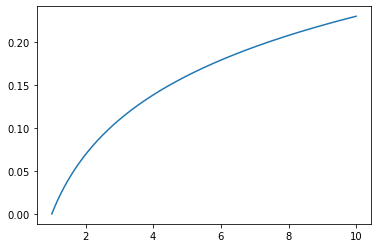

In [57]:
x = np.linspace(1, 10, 100000)
y = np.log(x)/10
plt.plot(x,y)

<ipython-input-58-098b9115a3fd>:2: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)
<ipython-input-58-098b9115a3fd>:4: RuntimeWarning: divide by zero encountered in log
  y3 = -np.log(1-x)


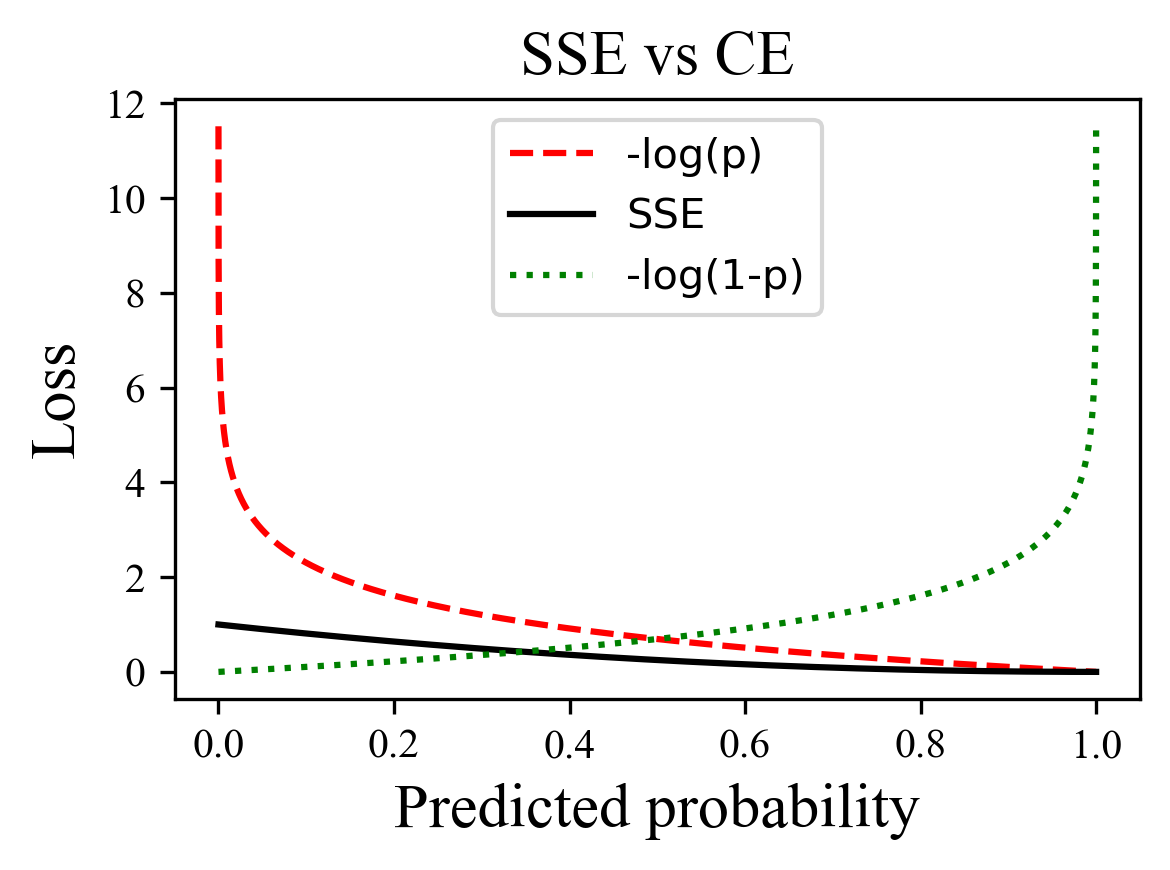

In [58]:
x = np.linspace(0, 1, 100000)
y1 = -np.log(x) 
y2 = (1-x)**2
y3 = -np.log(1-x) 
plt.figure(figsize = (4,3), dpi = 300)
plt.plot(x,y1,"r--",label='-log(p)')
plt.plot(x,y2,"k-",label='SSE')
plt.plot(x,y3,"g:",label='-log(1-p)')
plt.ylabel("Loss",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.xlabel("Predicted probability",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.title("SSE vs CE",fontdict={'fontname':'Times New Roman', 'fontsize':15})
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')
plt.tight_layout()
plt.legend()
plt.savefig("graph.png",bbox_inches='tight',dpi=(300)) 
plt.show()

In [59]:
pwd

'D:\\10.PROGRAMS\\Python_Programs\\3.Raja\\Deep learning\\HM-SGD'

In [60]:
0.000923**2

8.51929e-07

In [61]:
num1 = 0.03
num2 = -0.12
2*num1*num2/(num1+num2)

0.08

In [62]:
0.12/0.048

2.5

In [63]:
model.save_weights('weights.h5')

###### Testing the model

In [65]:
model_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9364


[0.22777915000915527, 0.9363999962806702]

Let us predict for the first image in the testing set

In [66]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 836us/step


array([[7.86231518e-01, 3.83661827e-03, 8.74364913e-01, ...,
        9.99941587e-01, 4.62760419e-01, 8.67271423e-01],
       [8.88792515e-01, 2.30232418e-01, 9.99848306e-01, ...,
        6.66616397e-05, 8.94774556e-01, 5.17798075e-03],
       [2.01873798e-02, 9.97470915e-01, 7.17460036e-01, ...,
        6.72159731e-01, 6.50803506e-01, 2.17741206e-01],
       ...,
       [7.56842876e-03, 4.34668036e-03, 1.23064466e-01, ...,
        8.04960310e-01, 9.43464518e-01, 9.85986829e-01],
       [2.91048855e-01, 3.98422420e-01, 2.21812993e-01, ...,
        2.32957006e-02, 9.93541658e-01, 6.22355267e-02],
       [9.31385994e-01, 2.88842036e-03, 9.83554780e-01, ...,
        1.26865262e-03, 5.51365256e-01, 1.29196435e-01]], dtype=float32)

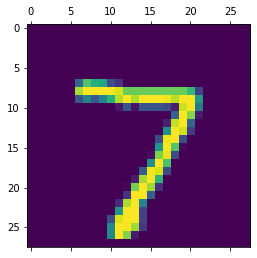

In [67]:
plt.matshow(X_test[0])

In [70]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 868us/step


In [71]:
y_predicted[0]
# Displays the probability score for each class label. 

array([7.8623152e-01, 3.8366183e-03, 8.7436491e-01, 9.7980350e-01,
       1.7257538e-02, 5.5916727e-01, 2.0757272e-04, 9.9994159e-01,
       4.6276042e-01, 8.6727142e-01], dtype=float32)

In [72]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [73]:
y_predicted[:5]

array([[7.8623152e-01, 3.8366183e-03, 8.7436491e-01, 9.7980350e-01,
        1.7257538e-02, 5.5916727e-01, 2.0757272e-04, 9.9994159e-01,
        4.6276042e-01, 8.6727142e-01],
       [8.8879251e-01, 2.3023242e-01, 9.9984831e-01, 9.7442061e-01,
        6.6843606e-04, 9.8176146e-01, 9.7612447e-01, 6.6661640e-05,
        8.9477456e-01, 5.1779808e-03],
       [2.0187380e-02, 9.9747092e-01, 7.1746004e-01, 5.0509018e-01,
        2.4894500e-01, 2.1681942e-01, 3.9143071e-01, 6.7215973e-01,
        6.5080351e-01, 2.1774121e-01],
       [9.9995065e-01, 3.0765973e-04, 8.2767069e-01, 6.2064284e-01,
        2.4752002e-03, 8.9210284e-01, 6.8648225e-01, 7.3614383e-01,
        4.1175497e-01, 5.7757151e-01],
       [3.1644604e-01, 5.5405539e-03, 6.8021160e-01, 1.1801334e-01,
        9.9674982e-01, 2.4906980e-01, 6.0487384e-01, 7.6941299e-01,
        6.1941051e-01, 9.3719208e-01]], dtype=float32)

In [74]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [75]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1112,    3,    2,    1,    1,    4,    2,   10,    0],
       [   7,    5,  944,    9,   11,    6,    9,   15,   21,    5],
       [   3,    0,   14,  933,    0,   21,    3,   13,   15,    8],
       [   1,    2,    3,    1,  928,    0,   10,    2,    5,   30],
       [   9,    2,    1,   36,    7,  796,   13,    5,   15,    8],
       [   9,    3,    3,    1,   12,    9,  917,    1,    3,    0],
       [   2,    8,   22,    5,    8,    0,    0,  960,    2,   21],
       [   6,    5,    3,   20,    9,   16,   10,    8,  891,    6],
       [  10,    7,    1,   11,   31,    4,    1,   15,    7,  922]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

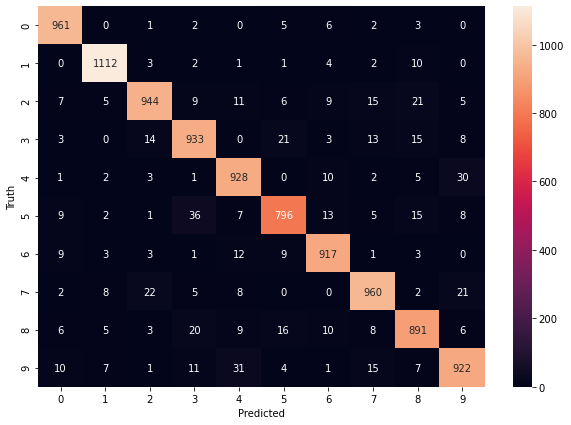

In [76]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h4 style='color:purple'>3. NN model with two hidden layers</h4> 

Adding layers should improve the performance

<img src="Figures/model3.png" height=400 width=400/>

Include flattening layer instead of manual flattening

###### Model configuration

In [77]:
model3 = keras.Sequential([
    # input layer with 784 neurons 
    keras.layers.Flatten(input_shape=(28,28)),
    # first hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # second hidden layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output layer with 10 neurons
    keras.layers.Dense(10, activation='sigmoid')
])

##### Model summary

In [78]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [79]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [80]:
X_train_Norm = X_train / 255
X_test_Norm = X_test / 255
# we did not flatten separately

In [81]:
model3.fit(X_train_Norm, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2782 - accuracy: 0.9187
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1250 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0917 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0731 - accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0595 - accuracy: 0.9807


###### Testing the model

In [82]:
model3.evaluate(X_test_Norm, y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.0876 - accuracy: 0.9731


[0.08758741617202759, 0.9731000065803528]

In [83]:
y_predicted = model3.predict(X_test_Norm)

313/313 [==============================] - 0s 831us/step


###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [84]:
y_predicted[:5]

array([[4.3184529e-03, 1.8040712e-03, 4.9219154e-02, 4.6361044e-01,
        2.0544210e-03, 1.8699553e-02, 1.0051007e-06, 9.9987203e-01,
        9.4866809e-03, 6.4397417e-02],
       [3.7684862e-03, 9.8686934e-01, 9.9999982e-01, 9.2941672e-01,
        1.4379748e-05, 8.4514700e-02, 4.9606236e-03, 9.8693022e-04,
        6.3844137e-02, 2.6057307e-07],
       [2.2620060e-03, 9.9932903e-01, 1.8021773e-01, 2.9769989e-02,
        5.0791781e-02, 8.5824087e-02, 2.0282252e-02, 2.4996231e-01,
        1.4380175e-01, 9.1825938e-03],
       [9.9992561e-01, 1.6070495e-04, 5.7425696e-01, 3.6077779e-02,
        7.2578117e-03, 4.5759141e-02, 4.4908366e-01, 1.1120176e-01,
        4.4437554e-03, 8.6186582e-01],
       [5.9865890e-03, 1.0278727e-03, 2.0487215e-02, 4.7237286e-03,
        9.9995333e-01, 9.3295611e-03, 4.7986742e-02, 1.3649619e-01,
        7.7751707e-03, 9.5899254e-01]], dtype=float32)

In [85]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [86]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    0,    1,    1,    4,    1,    3,    0],
       [   0, 1127,    2,    2,    0,    0,    1,    1,    2,    0],
       [   6,    2,  986,   14,    4,    0,    4,    8,    8,    0],
       [   0,    0,    3,  993,    0,    0,    0,    7,    4,    3],
       [   0,    0,    3,    1,  964,    0,    3,    0,    1,   10],
       [   3,    0,    0,   28,    2,  836,   12,    1,    8,    2],
       [   4,    3,    1,    1,    6,    1,  939,    0,    3,    0],
       [   2,    3,    7,    1,    6,    0,    0,  998,    0,   11],
       [   2,    1,    4,    7,    6,    4,    2,    3,  941,    4],
       [   3,    3,    0,    8,   10,    1,    1,    3,    2,  978]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

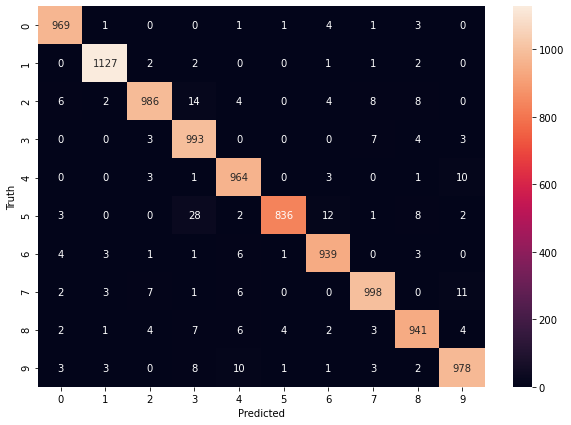

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')